### 1. Inspect Words with Character Count between 10 and 20:
We do this because the frequencies in this range look weird.

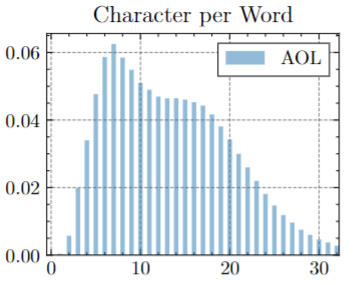

In [ ]:
from thesis_schneg.model import DatasetName

##### set visualization configuration #####

# select dataset (if none is selected all datasets are visualized in a joint plot) 
# dataset: DatasetName = None 
dataset: DatasetName = 'aol'
# dataset: DatasetName = 'aql'
# dataset: DatasetName = 'ms-marco'
# dataset: DatasetName = 'orcas'

analyses = []
# set analysis that should be visualized
# analyses.append('word-count-frequencies-named-entities')
# analyses.append('character-count-frequencies-words')
analyses.append('get-lengths-words')


# analyses.append('extract-named-entities')
# analyses.append('extract-words')
# analyses.append('extract-chars')


Load data:

In [ ]:
from thesis_schneg.vis_modules import _get_results_paths, load_results
import time

# load data
analysis_data = []
for analysis_name in analyses:
    if dataset is None:
        result_data = {}
        # crawl files from all datasets and load into dictionary

        paths = {f"{name}": _get_results_paths(name, analysis_name) for name in [
            "aol", "aql", "ms-marco", "orcas"]}
        # iterate over datasets and create visualization
        for name, result_paths in paths.items():
            start_time = time.time()
            print(f"Loading data from {name} dataset")
            vis_data = load_results(result_paths)
            result_data.update({name: vis_data})
            end_time = time.time()  
            print(f"{name} loaded in {(end_time - start_time)/60} min")
        label=["AOL", "AQL", "MS-MARCO", "ORCAS"]
        analysis_data.append(result_data)
    else:
        # load data from single dataset
        result_paths = _get_results_paths(dataset, analysis_name)
        start_time = time.time()
        print(f"Loading data from {dataset} dataset")
        result_data = {dataset: load_results(result_paths)}
        end_time = time.time()  
        print(f"{dataset} loaded in {(end_time - start_time)/60} min")
        analysis_data.append(result_data)   

Inspect:

In [ ]:

data = analysis_data[0][dataset]
for length in [4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25]:
    print(f"Length: {length}")
    data_queried = data.query('`character-count` == @length')
    print(data_queried.sort_values(by='count()', ascending=False).head(10))

As we can see, between words of length 10 until length 20, a lot of website addresses are frequent. Let's see if the distribtion ist still skewed after we remove internet domains from the word collection. Therefore, we create a dataset that is filtered by website addresses:

In [ ]:
data[~data["word"].str.contains(pat="http|www.|.com|.net|.org|.int|.edu", na=False)].to_parquet("/mnt/ceph/storage/data-in-progress/data-teaching/theses/thesis-schneg/analysis_data/analysis/aol-filter-urls-words-all/results.parquet")



### 2. Remove outliers from AQL 
We can observe, that querys with a certain length in character count are absurdly frequent. Namely, queries with a character count of 14, 16 and 24. Let's inspect the most frequent queries of this length.

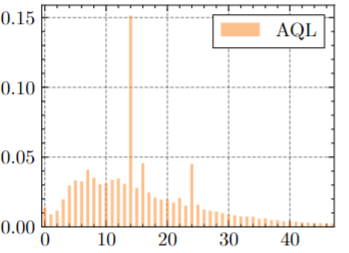

In [ ]:
from thesis_schneg.model import DatasetName

##### set visualization configuration #####

# select dataset (if none is selected all datasets are visualized in a joint plot) 
# dataset: DatasetName = None 
dataset: DatasetName = 'aql'
# dataset: DatasetName = 'aql'
# dataset: DatasetName = 'ms-marco'
# dataset: DatasetName = 'orcas'

analyses = []
# set analysis that should be visualized
# analyses.append('get-lengths-queries')
# analyses.append('character-count-frequencies-queries')
analyses.append('aql-anomaly')


Load data:

In [ ]:
from thesis_schneg.vis_modules import _get_results_paths, load_results
import time
import pyarrow.compute as pc
# load data
analysis_data = []
for analysis_name in analyses:
    # load data from single dataset
    result_paths = _get_results_paths(dataset, analysis_name)
    start_time = time.time()
    print(f"Loading data from {dataset} dataset")
    # filter_cols = (pc.field('character-count') == 14) | (pc.field('character-count') == 16) | (pc.field('character-count') == 24) 
    # result_data = {dataset: load_results(result_paths, cols=['serp_query_text_url', 'character-count', 'count()'], filter_cols=filter_cols)}
    result_data = {dataset: load_results(result_paths)}
    end_time = time.time()  
    print(f"{dataset} loaded in {(end_time - start_time)/60} min")
    analysis_data.append(result_data)   

In [ ]:
most_frequent_queries = []
for length in [14,16,24]:
    print(f"Length: {length}")
    data_queried = analysis_data[0][dataset].query('`character-count` == @length')
    data_queried_sorted = data_queried.sort_values(by='count()', ascending=False).head(20) 
    print(data_queried_sorted)
    most_frequent_queries.append(data_queried_sorted['serp_query_text_url'].head(1).to_list())
# analysis_data[0]['aql'].sort_values(by='count()', ascending=False).head(30).sort_values(by='character-count', ascending=True)
famous_queries = [item for sublist in most_frequent_queries for item in sublist]
print(famous_queries)

### 3. Inspect Queries with replcement character
Some results have shown that some queries of the AQL are subject to a decode error. A decode error is indicated by the replacement character '�'. Lets check the annual distribution of decode errors in the AQL. The following list was copied from a ray-log-file.

From a previous calculation we know that the total proportion of queries without decode error in the AQL is 98%. 




In [ ]:
import matplotlib.pyplot as plt
import numpy as np

repl_char_distr = [{'is-repl-char': False, 'year': 1999, 'count()': 25478}, {'is-repl-char': False, 'year': 2000, 'count()': 1263406}, {'is-repl-char': False, 'year': 2001, 'count()': 267292}, {'is-repl-char': False, 'year': 2002, 'count()': 397513}, {'is-repl-char': False, 'year': 2003, 'count()': 269122}, {'is-repl-char': False, 'year': 2004, 'count()': 171755}, {'is-repl-char': False, 'year': 2005, 'count()': 470890}, {'is-repl-char': False, 'year': 2006, 'count()': 448572}, {'is-repl-char': False, 'year': 2007, 'count()': 917387}, {'is-repl-char': False, 'year': 2008, 'count()': 1338079}, {'is-repl-char': False, 'year': 2009, 'count()': 2352937}, {'is-repl-char': False, 'year': 2010, 'count()': 2348165}, {'is-repl-char': False, 'year': 2011, 'count()': 3216660}, {'is-repl-char': False, 'year': 2012, 'count()': 6157250}, {'is-repl-char': False, 'year': 2013, 'count()': 12451812}, {'is-repl-char': False, 'year': 2014, 'count()': 12215405}, {'is-repl-char': False, 'year': 2015, 'count()': 16154971}, {'is-repl-char': False, 'year': 2016, 'count()': 11455414}, {'is-repl-char': False, 'year': 2017, 'count()': 20537444}, {'is-repl-char': False, 'year': 2018, 'count()': 28028870}, {'is-repl-char': False, 'year': 2019, 'count()': 79099389}, {'is-repl-char': False, 'year': 2020, 'count()': 50015354}, {'is-repl-char': False, 'year': 2021, 'count()': 40084932}, {'is-repl-char': False, 'year': 2022, 'count()': 49708962}, {'is-repl-char': True, 'year': 1999, 'count()': 78}, {'is-repl-char': True, 'year': 2000, 'count()': 94522}, {'is-repl-char': True, 'year': 2001, 'count()': 18193}, {'is-repl-char': True, 'year': 2002, 'count()': 59985}, {'is-repl-char': True, 'year': 2003, 'count()': 153909}, {'is-repl-char': True, 'year': 2004, 'count()': 92108}, {'is-repl-char': True, 'year': 2005, 'count()': 872785}, {'is-repl-char': True, 'year': 2006, 'count()': 530612}, {'is-repl-char': True, 'year': 2007, 'count()': 386372}, {'is-repl-char': True, 'year': 2008, 'count()': 582978}, {'is-repl-char': True, 'year': 2009, 'count()': 593834}, {'is-repl-char': True, 'year': 2010, 'count()': 570016}, {'is-repl-char': True, 'year': 2011, 'count()': 620483}, {'is-repl-char': True, 'year': 2012, 'count()': 1005385}, {'is-repl-char': True, 'year': 2013, 'count()': 451972}, {'is-repl-char': True, 'year': 2014, 'count()': 82703}, {'is-repl-char': True, 'year': 2015, 'count()': 22762}, {'is-repl-char': True, 'year': 2016, 'count()': 64036}, {'is-repl-char': True, 'year': 2017, 'count()': 100020}, {'is-repl-char': True, 'year': 2018, 'count()': 186318}, {'is-repl-char': True, 'year': 2019, 'count()': 247155}, {'is-repl-char': True, 'year': 2020, 'count()': 52860}, {'is-repl-char': True, 'year': 2021, 'count()': 68473}, {'is-repl-char': True, 'year': 2022, 'count()': 56350}]
annual_distr = []
for dic in repl_char_distr:
    if dic['is-repl-char']:
        annual_distr.append({'year': dic['year'], 'repl-count': dic['count()'], 'non-repl-count': 0})

for dic in repl_char_distr:
    if not dic['is-repl-char']:
        for dic2 in annual_distr:
            if dic['year'] == dic2['year']:
                dic2['non-repl-count'] = dic['count()']

# plot with absolute values
for dic in annual_distr:
    dic['absolute-counts'] = (dic['repl-count'] + dic['non-repl-count'])
y1 = [dic['absolute-counts'] for dic in annual_distr]
y2 = [dic['repl-count'] for dic in annual_distr]
x = [dic['year'] for dic in annual_distr]

plt.bar(x, y1, color='b', label='query-count')
plt.bar(x, y2, color='r', label='decode-error-count')
plt.xlim(1998, 2014)
plt.ylim(0, 2e7)
plt.xlabel('Year')
plt.ylabel('Counts')
plt.title('Absolute Counts of Queries with Decode Error (AQL)')
plt.legend()
plt.show()

#plot with relative values
for dic in annual_distr:
    dic['ratio'] = dic['repl-count'] / (dic['repl-count'] + dic['non-repl-count'])

x = [dic['year'] for dic in annual_distr]
y = [dic['ratio'] for dic in annual_distr]


plt.plot(x, np.array(y)*100, marker='o')
plt.xlabel('Year')
plt.ylabel('Propotion (%)')
plt.title('Proportion of Queries with Decode Error (AQL)')
plt.show()
    

### 4. URLs in Queries
By diving deeper into the results of the word length of different query logs we can observe that a lot of queries contain URLs. Lets take a look at the annual proportion of queries that contain a URL in the AQL. The data was obtained by running 

`ray job submit --runtime-env ray-runtime-env.yml --no-wait -- python -m thesis_schneg analyser --dataset aql --analysis get-temporal-url-proportion --read-concurrency 100 --concurrency 32 --write-concurrency 100 --memory-scaler 8 --batch-size 1024`. 

In [ ]:
from thesis_schneg.vis_modules import _get_results_paths, load_results

analysis = 'get-temporal-url-proportion'
dataset = 'aql'
result_paths = _get_results_paths(dataset, analysis)
result_data = load_results(result_paths)


In [ ]:
import matplotlib.pyplot as plt
import numpy as np    
years = result_data['year'].unique()
years.sort()
annual_url_ratios = []
for year in years:
    data = result_data.query('year == @year')
    urls = data.query('`is-url`')['count()']
    non_urls = data.query('`is-url` == False')['count()']
    annual_url_ratios.append(urls.sum() / (urls.sum() + non_urls.sum()))
x = years
y = np.array(annual_url_ratios)*100   

plt.plot(x, y, marker='o')
plt.xlabel('Year')
plt.ylabel('Propotion (%)')
plt.title('Proportion of Queries with URL (AQL)')
plt.show()

### 5. AQL: Queries with only one or zero characters
From previous plots, we could see that the AQL contains many queries consisting of zero or only one character. Let's insepect these queries. 

Characters per Query (How zero or one character?):

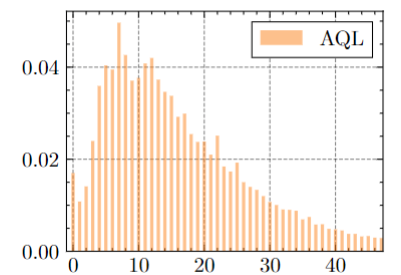

Words per Query (How zero words?)

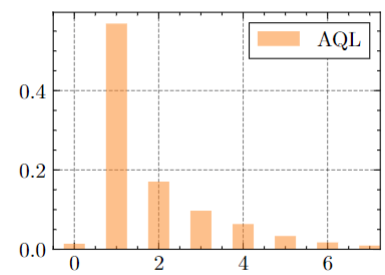

Let's review the specific character counts and word counts: 

In [ ]:
from thesis_schneg.model import DatasetName
from thesis_schneg.vis_modules import _get_results_paths, load_results


dataset: DatasetName = 'aql'

# 1.
analyses = []
analyses.append('character-count-frequencies-queries') 
paths = _get_results_paths(dataset, analyses[0])
result_data = load_results(paths)
print(result_data.sort_values(by='character-count',ascending=True).head(10))

# 2.
analyses = []
analyses.append('word-count-frequencies-queries')
paths = _get_results_paths(dataset, analyses[0])
result_data = load_results(paths)
print(result_data.sort_values(by='word-count',ascending=True).head(10))


We can see that a character count of $0$ and $1$ is not neglectable as well as a word count of $0$. It is very strinking that the number of queries with character count of $0$ is exactly the same as the number of queries with word count of $0$. We can conclude that those queries are likely the same. Let's inspect the actual queries with character count of $0$ and $1$:

In [ ]:
from thesis_schneg.model import DatasetName
from thesis_schneg.vis_modules import _get_results_paths, load_results


dataset: DatasetName = 'aql'


analyses = []
analyses.append('get-too-short-queries') #-{struc}

paths = _get_results_paths(dataset, analyses[0])
result_data = load_results(paths)

print(f"{result_data.query('`character-count` == 0').head(10)}\n{result_data.query('`character-count` == 1').head(10)}")

We can conclude that the queries with character count or word count of $0$ are empty strings. They can be filtered since they dont contribute additional information.

The queries with character count of $1$ are often asian characters, which makes sense since a single asian character could express a whole word. Among the most frequent queries with character count of $1$ also punctuation characters as well as numbers or emojis appear.

Now, let's check the queries with character count of $0$ and $1$ after a further cleaning of the AQL:

In [ ]:
from thesis_schneg.model import DatasetName
from thesis_schneg.vis_modules import _get_results_paths, load_results


dataset: DatasetName = 'aql'


analyses = []
analyses.append('get-too-short-queries2') #-{struc}

paths = _get_results_paths(dataset, analyses[0])
result_data = load_results(paths)

print(f"{result_data.query('`character-count` == 0').head(10)}\n{result_data.query('`character-count` == 1').head(10)}")

And, indeed, the querys of length $0$ were also the queries that contain $0$ words. This can be concluded because there were no queries with character count of $0$ left. 

### 6. Outliers in AOL
By observing the frequency plot of character counts in the AOL, it is striking that the AOL contains an unorthodoxly high amount of queries with length $1$. Let's find out about these queries:

In [ ]:
from thesis_schneg.model import DatasetName
from thesis_schneg.vis_modules import _get_results_paths, load_results
from pyarrow import compute as pc

dataset: DatasetName = 'aol'


analyses = []
analyses.append('get-lengths-queries') #-{struc}

paths = _get_results_paths(dataset, analyses[0])
result_data = load_results(paths, cols=['serp_query_text_url', 'character-count'], filter_rows=pc.field('character-count') == 1)
result_data = result_data.groupby(by="serp_query_text_url").count().reset_index().rename(columns={"character-count": "count()"})
print(result_data.sort_values(by='count()', ascending=False).head(10))

### 7. Search Operators
We inspect the results of 
- extract search operators
- search operators count per query

First, let's load the results of 'extract-search-operators' and inspect the most frequent search operators for each data set:

In [ ]:
from thesis_schneg.model import DatasetName
from thesis_schneg.vis_modules import _get_results_paths, load_results
import time

analysis_name = 'extract-search-operators'

dataset = None
# dataset = 'aol'
# dataset = 'aql'
# dataset = 'ms-marco'
# dataset = 'orcas'


if dataset is None:
    result_data = {}

    # crawl files from all datasets and load into dictionary
    paths = {f"{name}": _get_results_paths(name, analysis_name) for name in [
        "aol", "aql", "ms-marco", "orcas"]}
    # iterate over datasets and create visualization
    for name, result_paths in paths.items():
        start_time = time.time()
        print(f"Loading data from {name} dataset")
        vis_data = load_results(result_paths)
        result_data.update({name: vis_data})
        end_time = time.time()  
        print(f"{name} loaded in {(end_time - start_time)/60} min")
else:
    result_data = {}
    path = _get_results_paths(dataset, analysis_name)
    vis_data = load_results(path)
    result_data.update({dataset: vis_data})


Now, lets have a look at the most frequent search operators and compare their relative frequency among the different query logs:

In [ ]:
# sort operators by frequency and display the most frequent search operators
sizes = {"aol": 36389567, "aql": 346310968, "ms-marco": 9224790, "orcas": 10405311}
if dataset is None:
    for dataset, data in result_data.items():
        data = data.sort_values(by='count()', ascending=False)
        data['relative-frequency-percent'] = round(100*data['count()'] / sizes[dataset],5)
        total_count = data['count()'].sum()
        print(f"Total count of search operators in {dataset}: {total_count}\nRelative frequency of search operators in {dataset}: {round(100*total_count/sizes[dataset],5)}%")
        print(f"{dataset}:\n{data}\n")
else:   
    data = result_data[dataset]
    data = data.sort_values(by='count()', ascending=False)
    data['relative-frequency-percent'] = round(100*data['count()'] / sizes[dataset],5)
    print(data)

Next, we compare the frequencies of search operator counts per query:

In [ ]:
from thesis_schneg.model import DatasetName
from thesis_schneg.vis_modules import _get_results_paths, load_results
import time

analysis_name = 'search-operators-count'

dataset = None
# dataset = 'aol'
# dataset = 'aql'
# dataset = 'ms-marco'
# dataset = 'orcas'


if dataset is None:
    result_data = {}

    # crawl files from all datasets and load into dictionary
    paths = {f"{name}": _get_results_paths(name, analysis_name) for name in [
        "aol", "aql", "ms-marco", "orcas"]}
    # iterate over datasets and create visualization
    for name, result_paths in paths.items():
        start_time = time.time()
        print(f"Loading data from {name} dataset")
        vis_data = load_results(result_paths)
        result_data.update({name: vis_data})
        end_time = time.time()  
        print(f"{name} loaded in {(end_time - start_time)/60} min")
else:
    result_data = {}
    path = _get_results_paths(dataset, analysis_name)
    vis_data = load_results(path)
    result_data.update({dataset: vis_data})

Now, let's compare the relative operators count frequencies after sorting them with respect to the operator count:

In [ ]:
import matplotlib.pyplot as plt
fig,axes = plt.subplots(2,2, figsize=(15,10))
for i, (key, data) in enumerate(result_data.items()):
    data = data.sort_values(by='operator-count', ascending=True)
    data['relative-frequency-percent'] = round(100*data['count()'] / data['count()'].sum(),5)
    print(f"{key}:\n{data}")
    x = data['operator-count'].to_list()
    y = data['count()'].to_numpy()
    y = 100*y/y.sum()
    axes[i//2, i%2].bar(x[0:10], y[0:10])
    axes[i//2, i%2].set_title(f"{key.upper()} Search Operators Count")

### 8. Top Queries
Let's inspect the top queries of the logs:

In [ ]:
from thesis_schneg.model import DatasetName
from thesis_schneg.vis_modules import _get_results_paths, load_results
import time

analysis_name = 'query-frequencies'
# note that we only consider the top queries of cleaned aql


# dataset = None
dataset = 'aol'
# dataset = 'aql'
# dataset = 'ms-marco'
# dataset = 'orcas'


if dataset is None:
    result_data = {}

    # crawl files from all datasets and load into dictionary
    paths = {f"{name}": _get_results_paths(name, analysis_name, cleaned_aql=True) for name in [
        "aol", "aql", "ms-marco", "orcas"]}
    # iterate over datasets and create visualization
    for name, result_paths in paths.items():
        start_time = time.time()
        print(f"Loading data from {name} dataset")
        vis_data = load_results(result_paths)
        result_data.update({name: vis_data})
        end_time = time.time()  
        print(f"{name} loaded in {(end_time - start_time)/60} min")
else:
    result_data = {}
    path = _get_results_paths(dataset, analysis_name, cleaned_aql=True)
    vis_data = load_results(path)
    result_data.update({dataset: vis_data})

In [ ]:
if dataset is None:
    for dataset, data in result_data.items():
        data = data.sort_values(by='count()', ascending=False).head(20)
        print(f"{dataset}:\n{data}\n")
else:
    data = result_data[dataset]
    sum = data['count()'].sum()
    data['relative-frequency-percent'] = round(100*data['count()'] / sum,5)
    data = data.sort_values(by='count()', ascending=False).head(40)
    for i in range(0, len(data), 10):
        print(data.iloc[i:i+10])
    # print(data)

### 9. Top Words
Let's inspect the top words of the logs:

In [ ]:
from thesis_schneg.model import DatasetName
from thesis_schneg.vis_modules import _get_results_paths, load_results
import time

analysis_name = 'extract-words'
# note that we only consider the top words of cleaned aql

dataset = None
# dataset = 'aol'
# dataset = 'aql'
# dataset = 'ms-marco'
# dataset = 'orcas'


if dataset is None:
    result_data = {}

    # crawl files from all datasets and load into dictionary
    paths = {f"{name}": _get_results_paths(name, analysis_name, cleaned_aql=True) for name in [
        "aol", "aql", "ms-marco", "orcas"]}
    # iterate over datasets and create visualization
    for name, result_paths in paths.items():
        start_time = time.time()
        print(f"Loading data from {name} dataset")
        vis_data = load_results(result_paths)
        result_data.update({name: vis_data})
        end_time = time.time()  
        print(f"{name} loaded in {(end_time - start_time)/60} min")
else:
    result_data = {}
    path = _get_results_paths(dataset, analysis_name,  cleaned_aql=True)
    vis_data = load_results(path)
    result_data.update({dataset: vis_data})

Top Words:

In [ ]:
if dataset is None:
    for dataset, data in result_data.items():
        data = data.sort_values(by='count()', ascending=False).head(20)
        print(f"{dataset}:\n{data}\n")
else:
    data = result_data[dataset]
    sum = data['count()'].sum()
    data['relative-frequency-percent'] = round(100*data['count()'] / sum,5)
    data = data.sort_values(by='count()', ascending=False).head(100)
    for i in range(0, len(data), 10):
        print(data.iloc[i:i+10])
    # print(data)

Intersection of Top Words between query logs:

In [ ]:
import numpy as np
## get the pairwise intersection of top words among the query logs
names = ["aol", "aql", "ms-marco", "orcas"]
# 1. get top words
top_words = []
for dataset, data in result_data.items():
    data = data.sort_values(by='count()', ascending=False).head(20)
    top_words.append(set(data['word'].to_list()))

# 2. get pairwise intersection
intersections = {}
for i in range(len(top_words)):
    for j in range(i+1, len(top_words)):
        intersection = top_words[i].intersection(top_words[j])
        intersections.update({f"{names[i].upper()} vs {names[j].upper()}": intersection})
        print(f"Intersection of {names[i].upper()} and {names[j].upper()}: {intersection}")
        print(f"Number of common words from {names[i].upper()} and {names[j].upper()}: {len(intersection)}")
        print("\n")

# 3. get the average intesection of all query logs without the aql
secs = []
for key, value in intersections.items():
    if 'AQL' not in key:
        # print(f"Intersection of {key}: {value}")
        # print(f"Number of common words from {key}: {len(value)}")
        secs.append(len(value))
    
print(len(secs))

avg = np.sum(secs) / len(secs)

# 3.1 get the variance in the intersections 
var = np.var(secs)
print(f"Variance in the intersections notAQL: {var}")
# 3.2 get the standard deviation in the intersections
std = np.std(secs)
print(f"Standard deviation in the intersections notAQL: {std}")

# 4. get the average intersection of the aql with all other query logs
secs2 = []
for key, value in intersections.items():
    if 'AQL' in key:
        # print(f"Intersection of {key}: {value}")
        # print(f"Number of common words from {key}: {len(value)}")
        secs2.append(len(value))
print(len(secs2))

avg2 = np.sum(secs2) / len(secs)


print(f"Average intersection of all query logs without the aql: {avg}")
print(f"Average intersection of the aql with all other query logs: {avg2}")

In [ ]:
from thesis_schneg.model import DatasetName
from thesis_schneg.vis_modules import _get_results_paths, load_results
import time

analysis_name = 'deduplicate-queries'
# note that we only consider the top words of cleaned aql

# dataset = None
dataset = 'aol'
# dataset = 'aql'
# dataset = 'ms-marco'
# dataset = 'orcas'


if dataset is None:
    result_data = {}

    # crawl files from all datasets and load into dictionary
    paths = {f"{name}": _get_results_paths(name, analysis_name, cleaned_aql=True) for name in [
        "aol", "aql", "ms-marco", "orcas"]}
    # iterate over datasets and create visualization
    for name, result_paths in paths.items():
        start_time = time.time()
        print(f"Loading data from {name} dataset")
        vis_data = load_results(result_paths)
        result_data.update({name: vis_data})
        end_time = time.time()  
        print(f"{name} loaded in {(end_time - start_time)/60} min")
else:
    result_data = {}
    path = _get_results_paths(dataset, analysis_name,  cleaned_aql=True)
    vis_data = load_results(path)
    result_data.update({dataset: vis_data})

print(result_data[dataset].shape)